In [1]:
import json

In [2]:
from glob import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
f_max = 0
out = "images"

In [4]:
%ll ../results
%ll backup/

total 120
drwxr-xr-x 82 1001 12288 Aug 22 12:28 log_AID_mobilenet_kw33/
drwxr-xr-x 82 1001 12288 Aug 20 00:44 log_AID_resnet_kw33_lr3/
drwxr-xr-x 82 1001 12288 Aug 19 20:25 log_AID_resnet_kw33_lr4/
drwxr-xr-x 82 1001 12288 Aug 22 05:42 log_AID_vgg16_kw33/
drwxr-xr-x 82 1001 12288 Aug 23 01:54 log_eurosat_mobilenet_kw33/
drwxr-xr-x 82 1001 12288 Aug 21 03:38 log_eurosat_resnet_kw33_lr3/
drwxr-xr-x 82 1001 12288 Aug 20 14:08 log_eurosat_resnet_kw33_lr4/
drwxr-xr-x 82 1001 12288 Aug 23 12:34 log_rsicb256_mobilenet_kw33/
drwxr-xr-x 82 1001 12288 Aug 22 01:00 log_rsicb256_resnet_kw33_lr3/
drwxr-xr-x 82 1001 12288 Aug 21 14:20 log_rsicb256_resnet_kw33_lr4/
total 228
-rw-r--r--  1 root  1194 Sep  7 14:04 bits.pdf
drwxr-xr-x 82 1001 12288 Aug 17 12:19 log_AID_mobilenet_kw33/
drwxr-xr-x 82 1001 12288 Aug 17 17:41 log_AID_resnet_kw33/
drwxr-xr-x 74 1001  4096 Aug 11 15:37 log_aid/
drwxr-xr-x 82 1001 12288 Aug 12 20:48 log_aid_kw32_lr3/
drwxr-xr-x 82 1001 12288 Aug 12 16:50 log_aid_kw32_lr4/
drwx

In [5]:
# RSI-CB256
# ---------
# backup/log_rsicb_kw32                   rsicb256-vgg16
# backup/log_rsicb256_mobilenet_kw33      rsicb256-mobilenet
# ../results/log_rsicb256_resnet_kw33_lr4 rsicb256-resnet50

# EuroSAT
# -------
# backup/log_eurosat_kw32                 eurosat-vgg16
# backup/log_eurosat_mobilenet_kw33       eurosat-mobilenet
# ../results/log_eurosat_resnet_kw33_lr4  eurosat-resnet50

# AID
# ---
# backup/log_aid_kw32_lr5                 aid-vgg16
# backup/log_AID_mobilenet_kw33           aid-mobilenet
# log_aid_resnet50_kw36_v1                aid-resnet50

In [6]:
#lp="../results/log_aid_kw32_lr"
lp="backup/log_aid_kw32_lr5"

# Some random parameters

In [7]:
j_files = glob(lp + "/*/*.json")
random.shuffle(j_files)
for idx in range(f_max):
    f = open (j_files[idx], "r")
    data = json.loads(f.read())
    print("---------------------------------------------")
    print(j_files[idx].split("/")[-1].split("_")[1])
    print("---------------------------------------------")
    x = np.arange(1, len(data["history_acc"])+1) 
    plt.figure(dpi=100)

    plt.plot(x, data["history_acc"], 'c', marker='^')
    plt.plot(x, data['history_val_acc'], 'r', marker='2')
    plt.plot(x, data['history_loss'], marker='v')
    plt.plot(x, data['history_val_loss'], linestyle='solid')
    
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))

    #plt.title('Training and validation accuracy')
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    #plt.title(j_files[idx].split("/")[-1].split("_")[1])
    plt.legend(["Training Accuracy", "Validation Accuracy", "Training  Loss", "Validation Loss"])
    plt.show()

# Reference


In [8]:
file_format="reference"
f_max = 8

In [9]:
import os
if not os.path.exists(out):
    os.makedirs(out)

---------------------------------------------
aid-reference-km-1-vgg16
---------------------------------------------


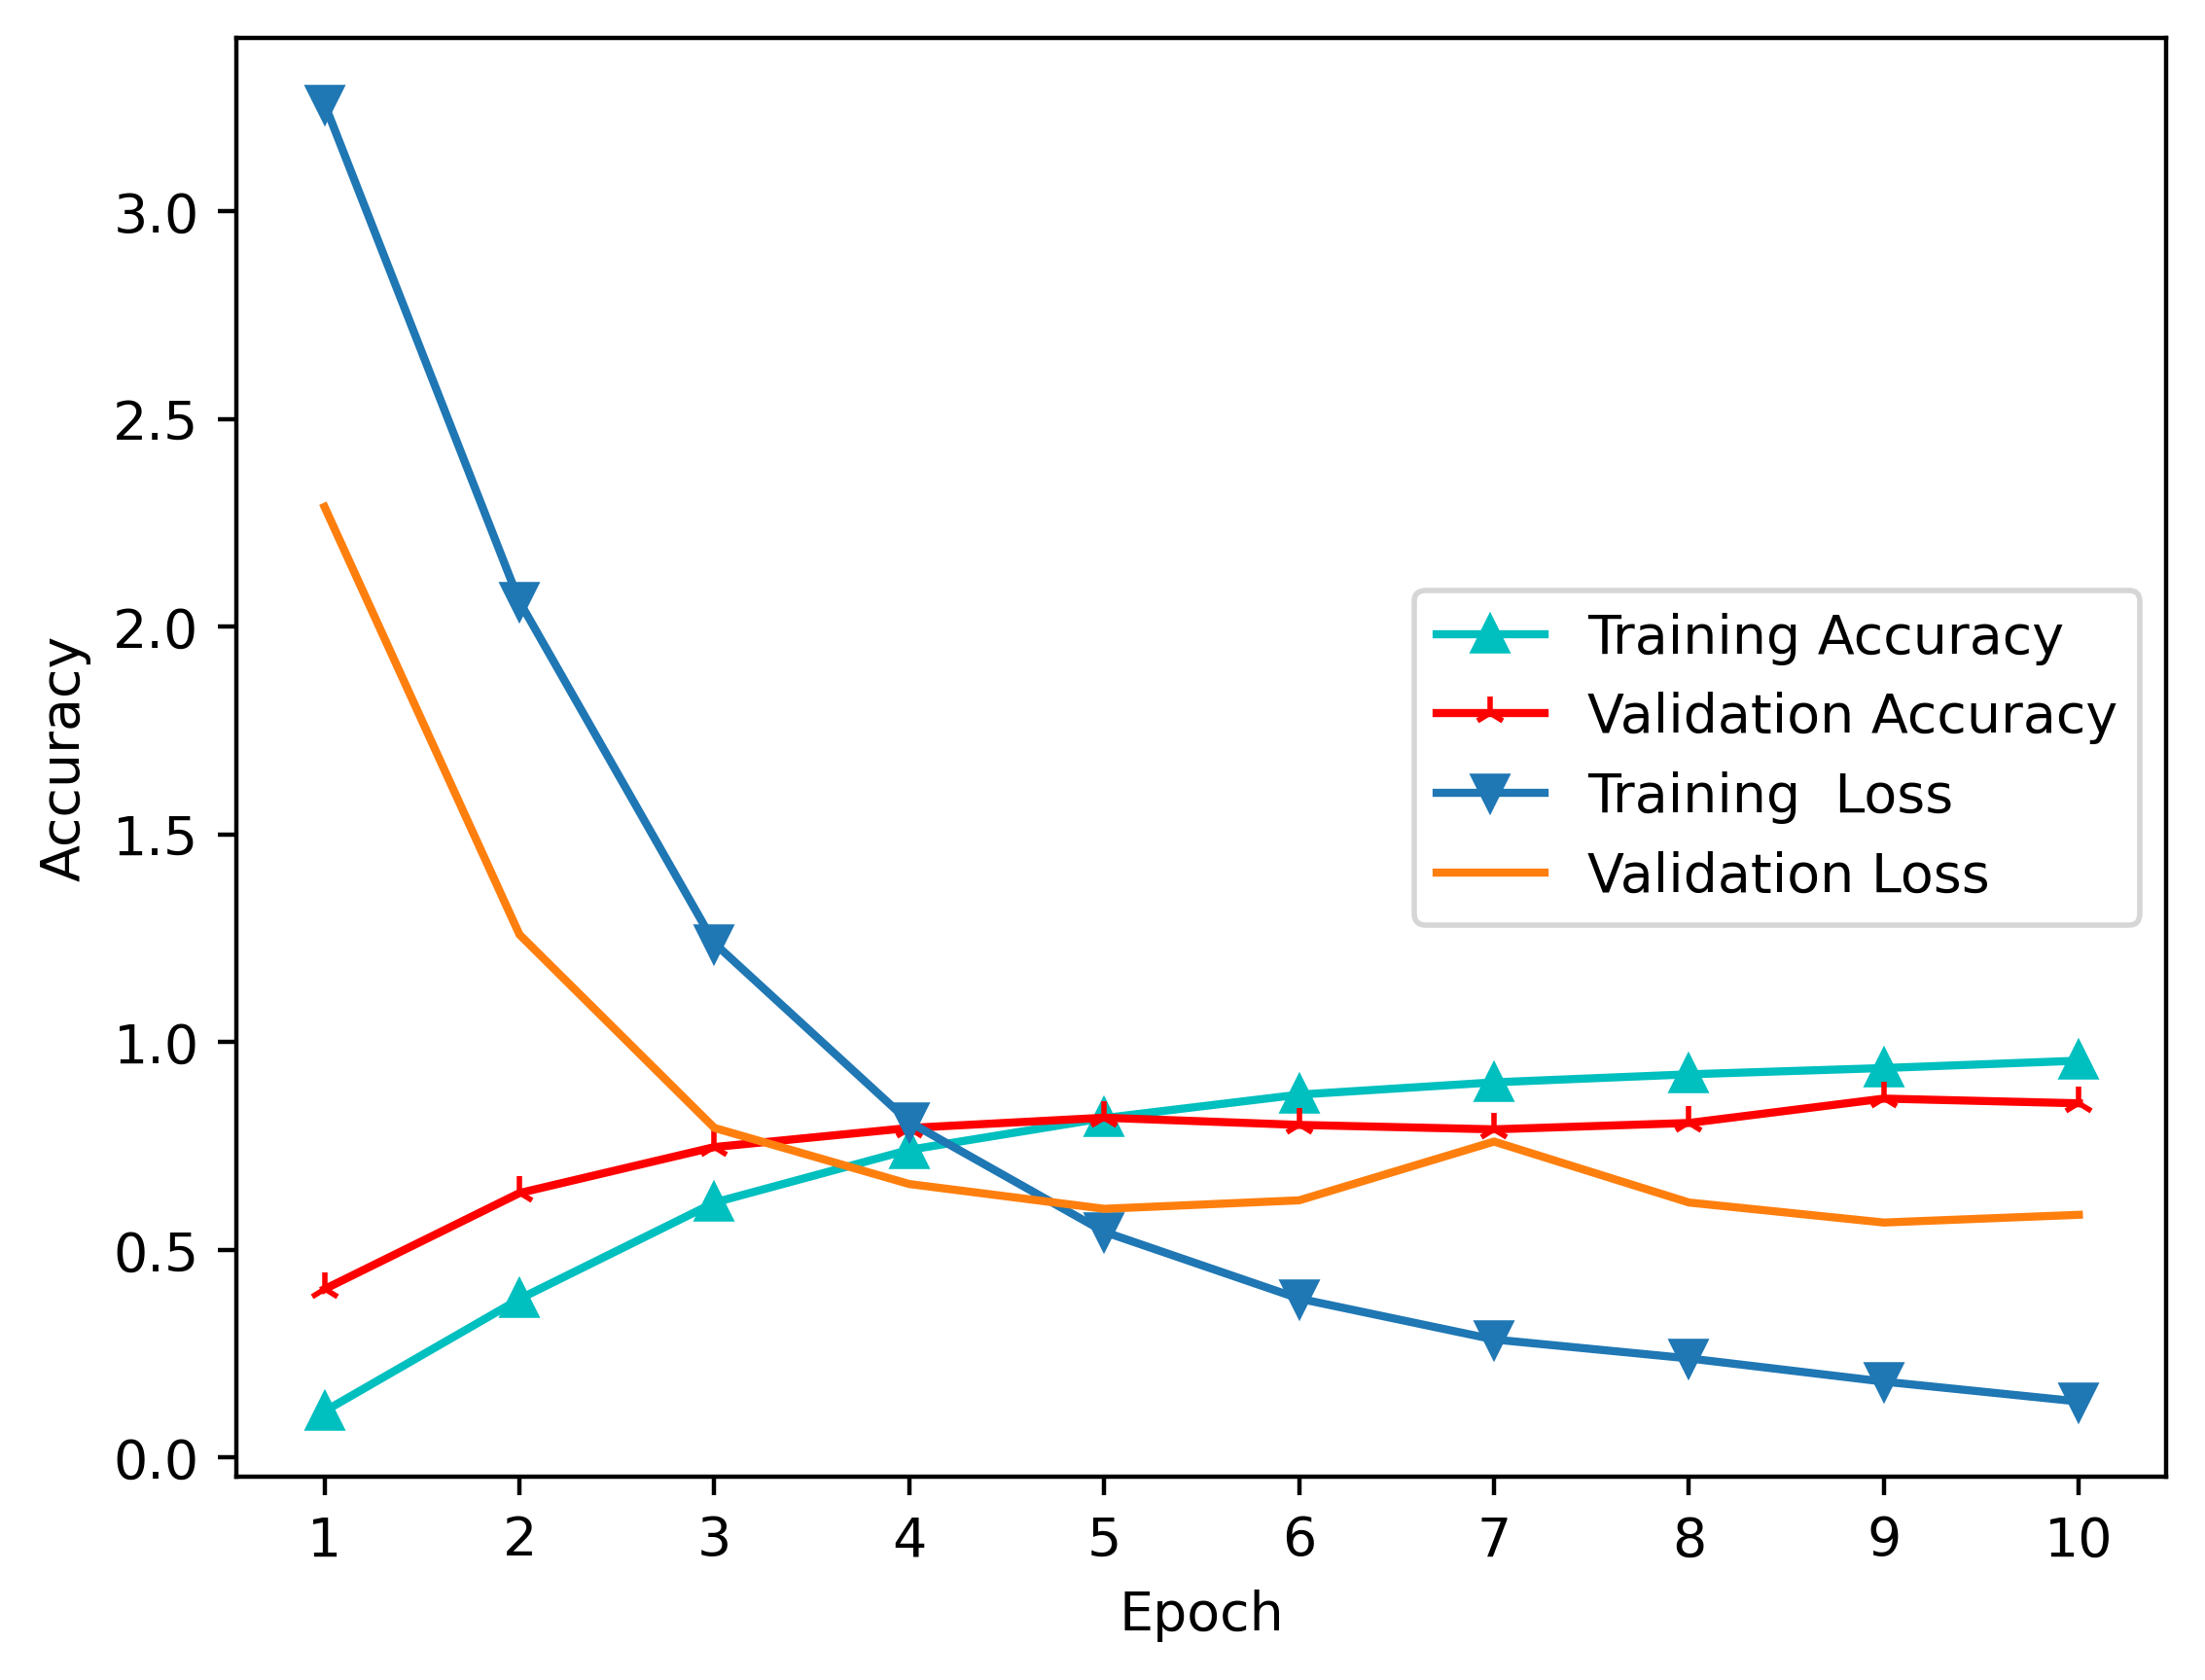

---------------------------------------------
aid-reference-km-2-vgg16
---------------------------------------------


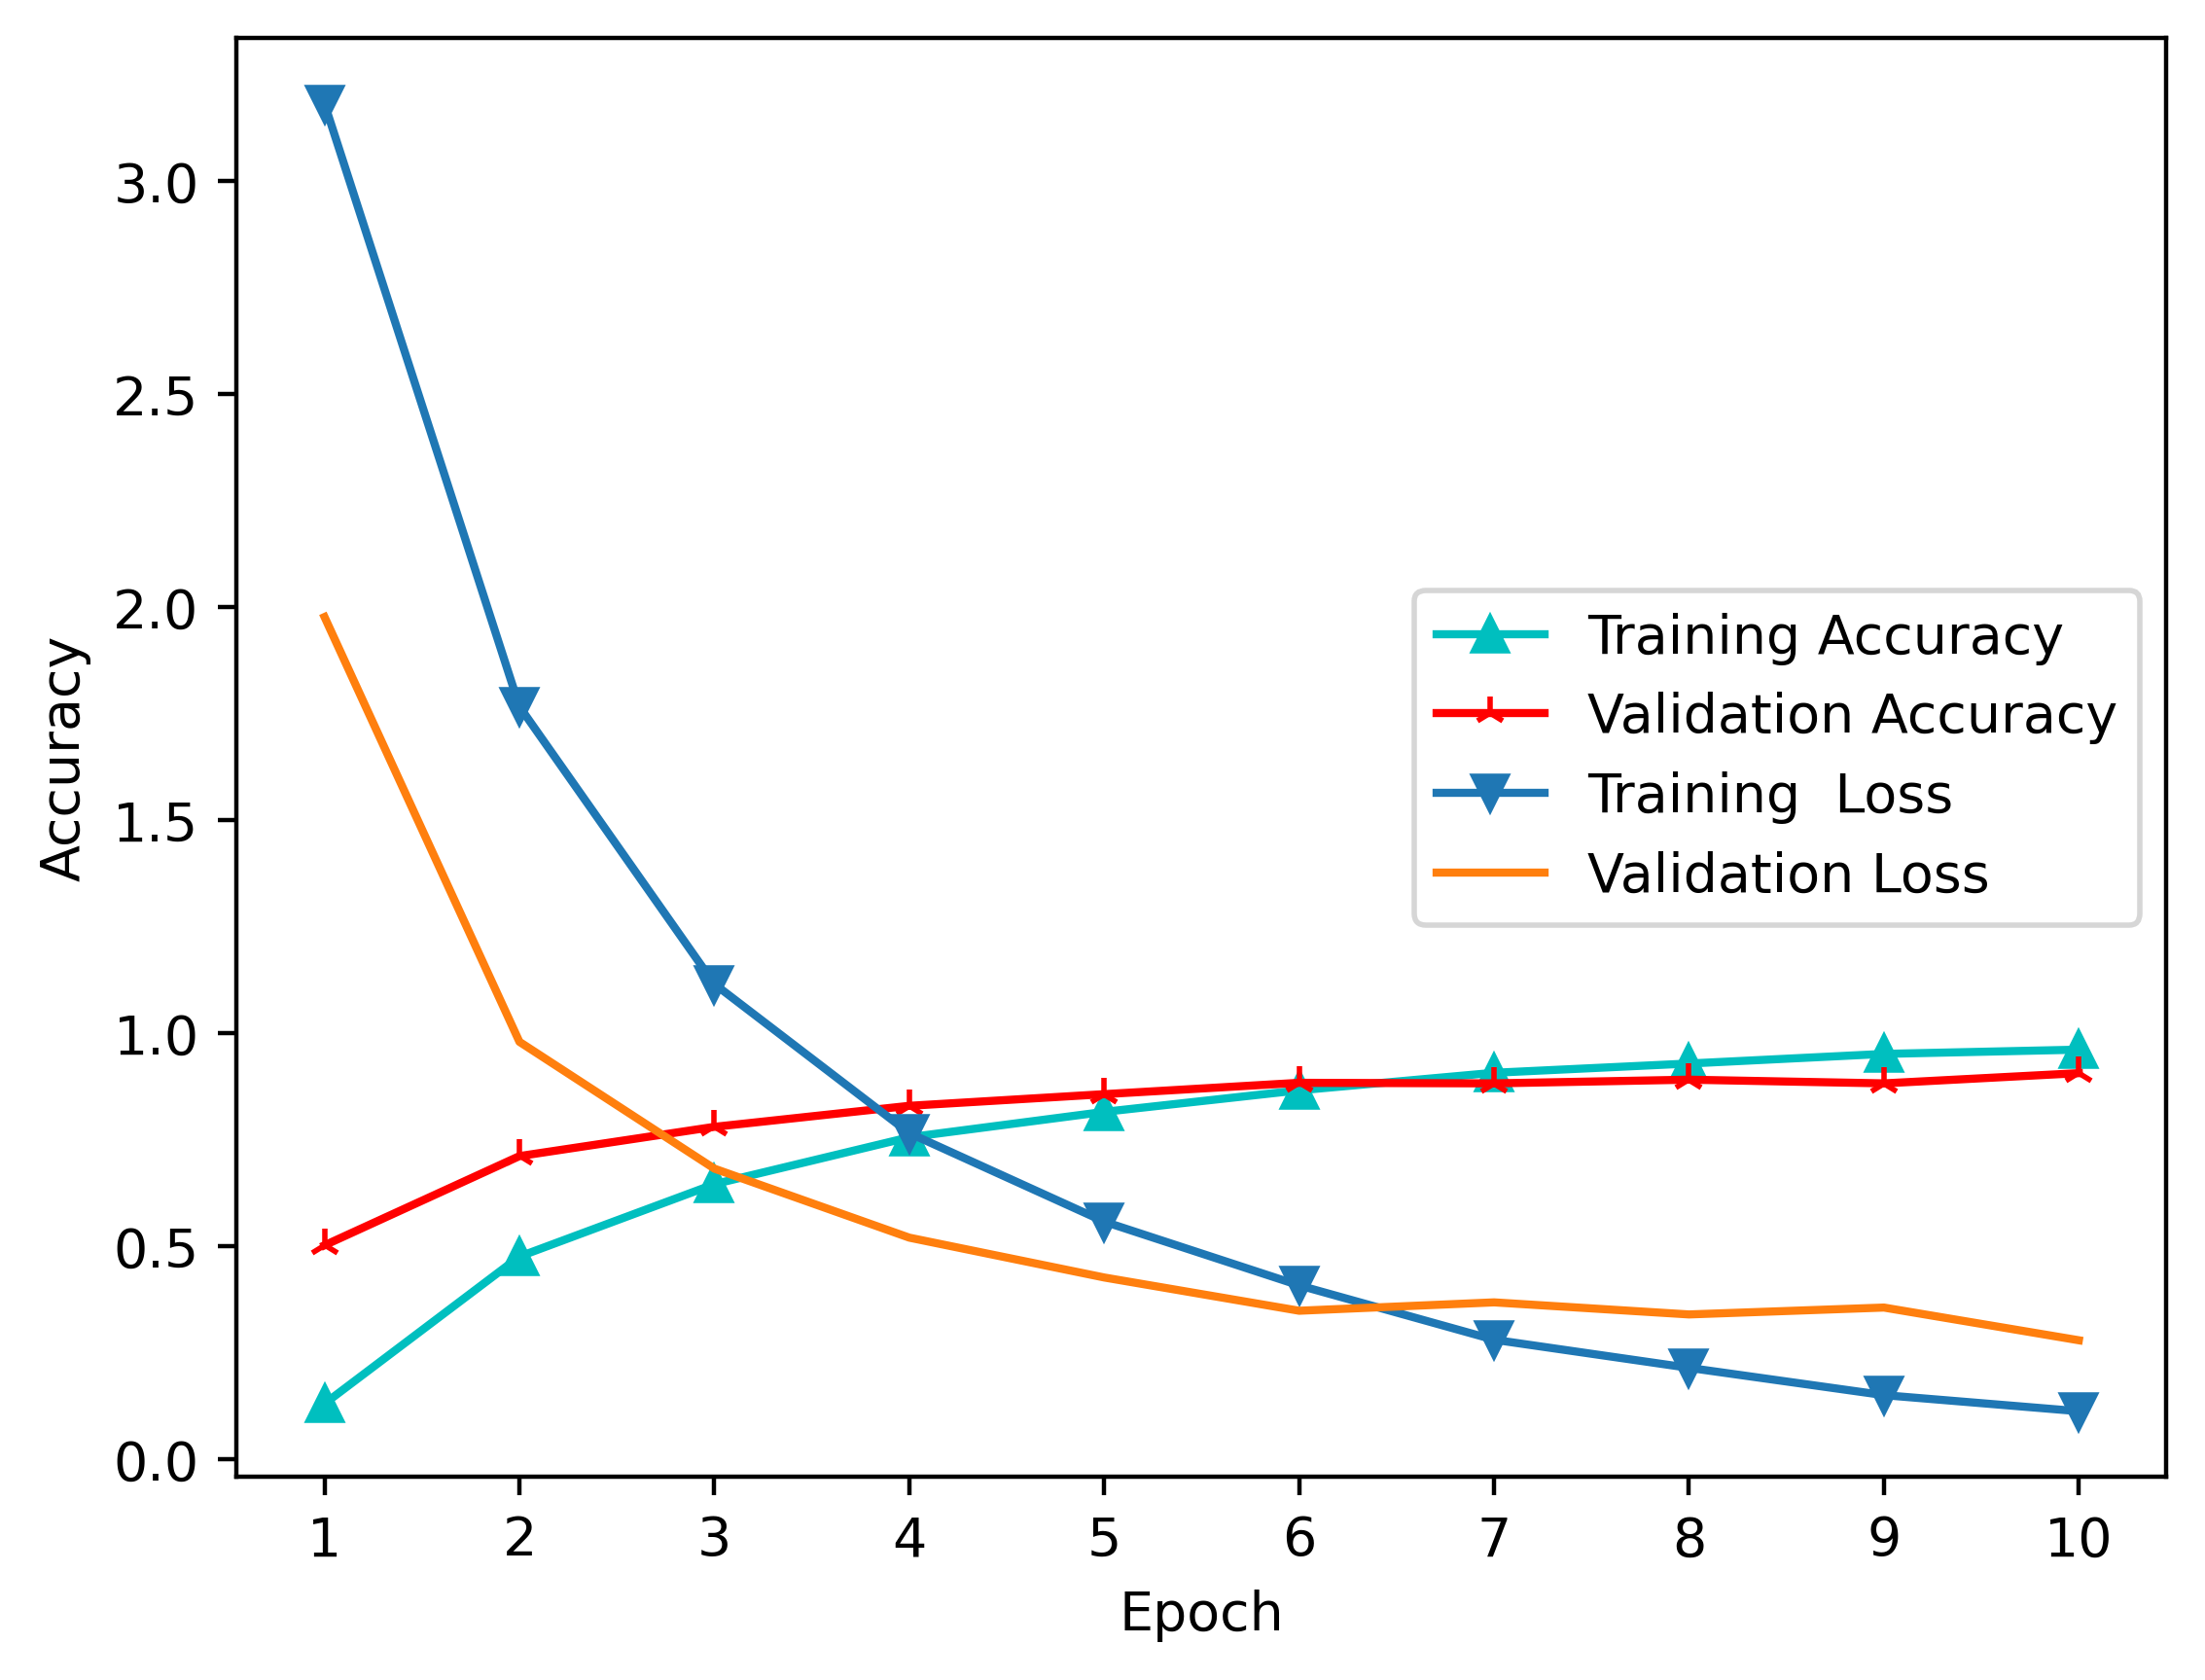

---------------------------------------------
aid-reference-km-3-vgg16
---------------------------------------------


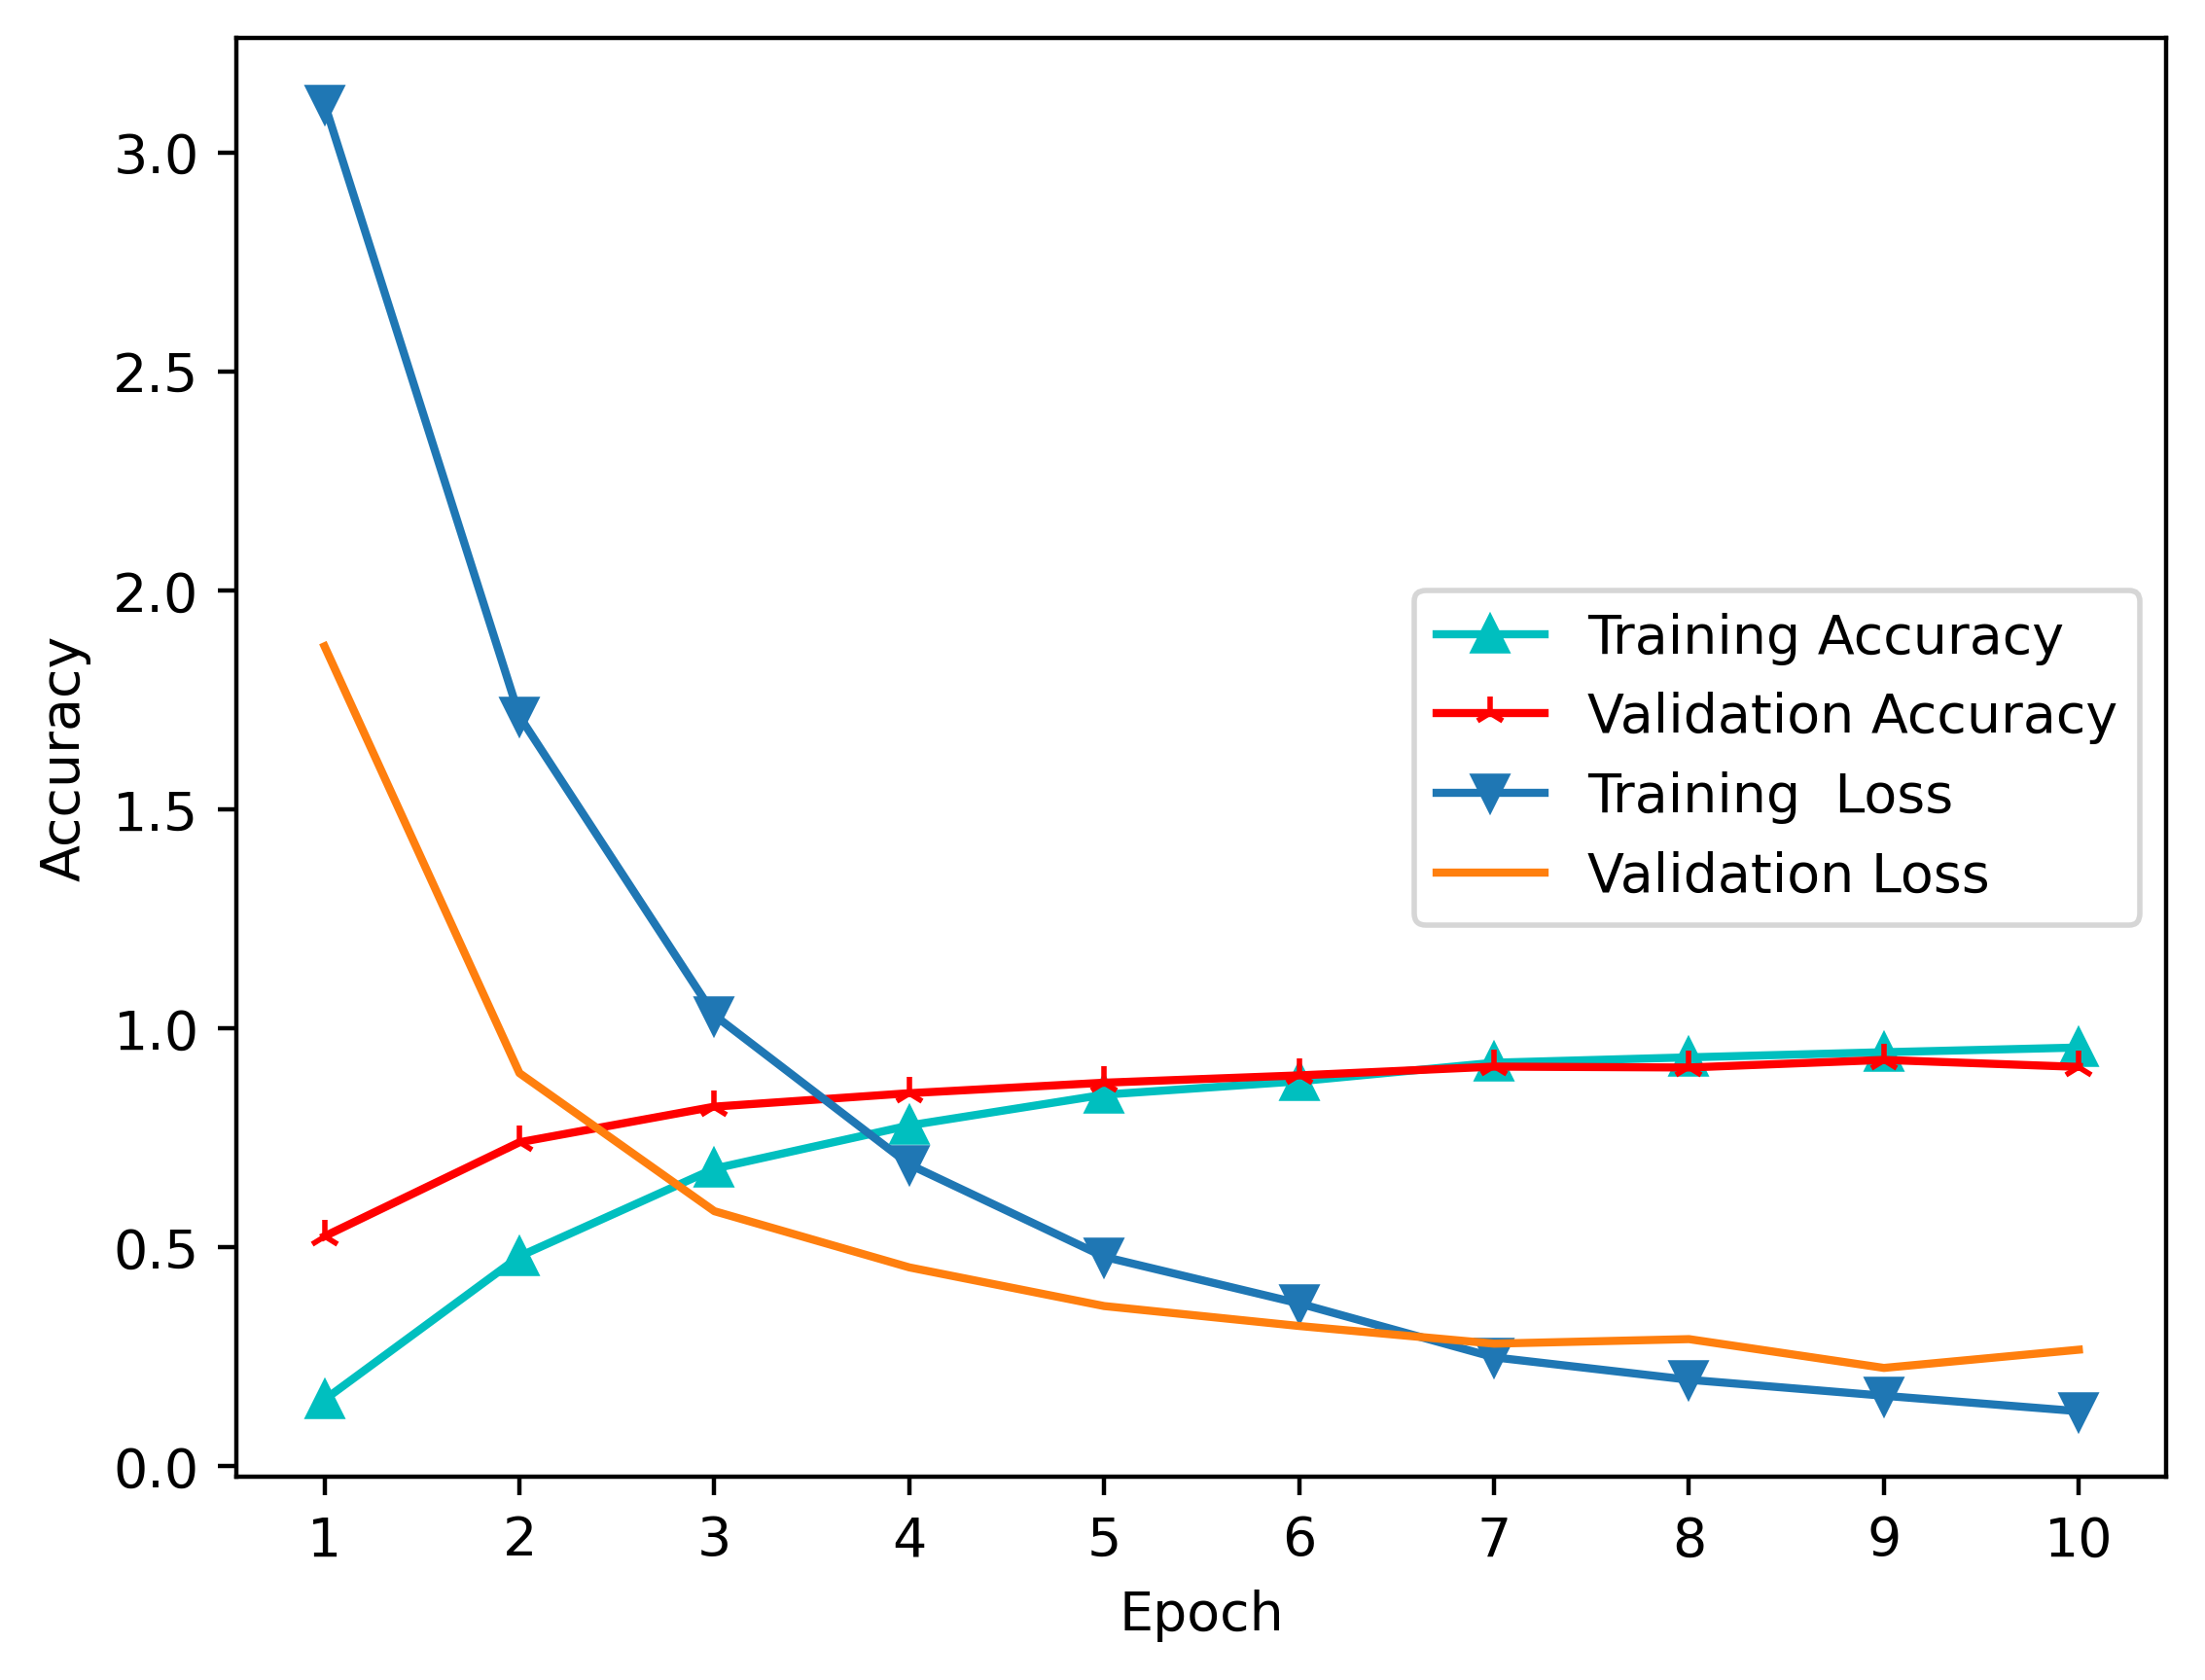

---------------------------------------------
aid-reference-km-4-vgg16
---------------------------------------------


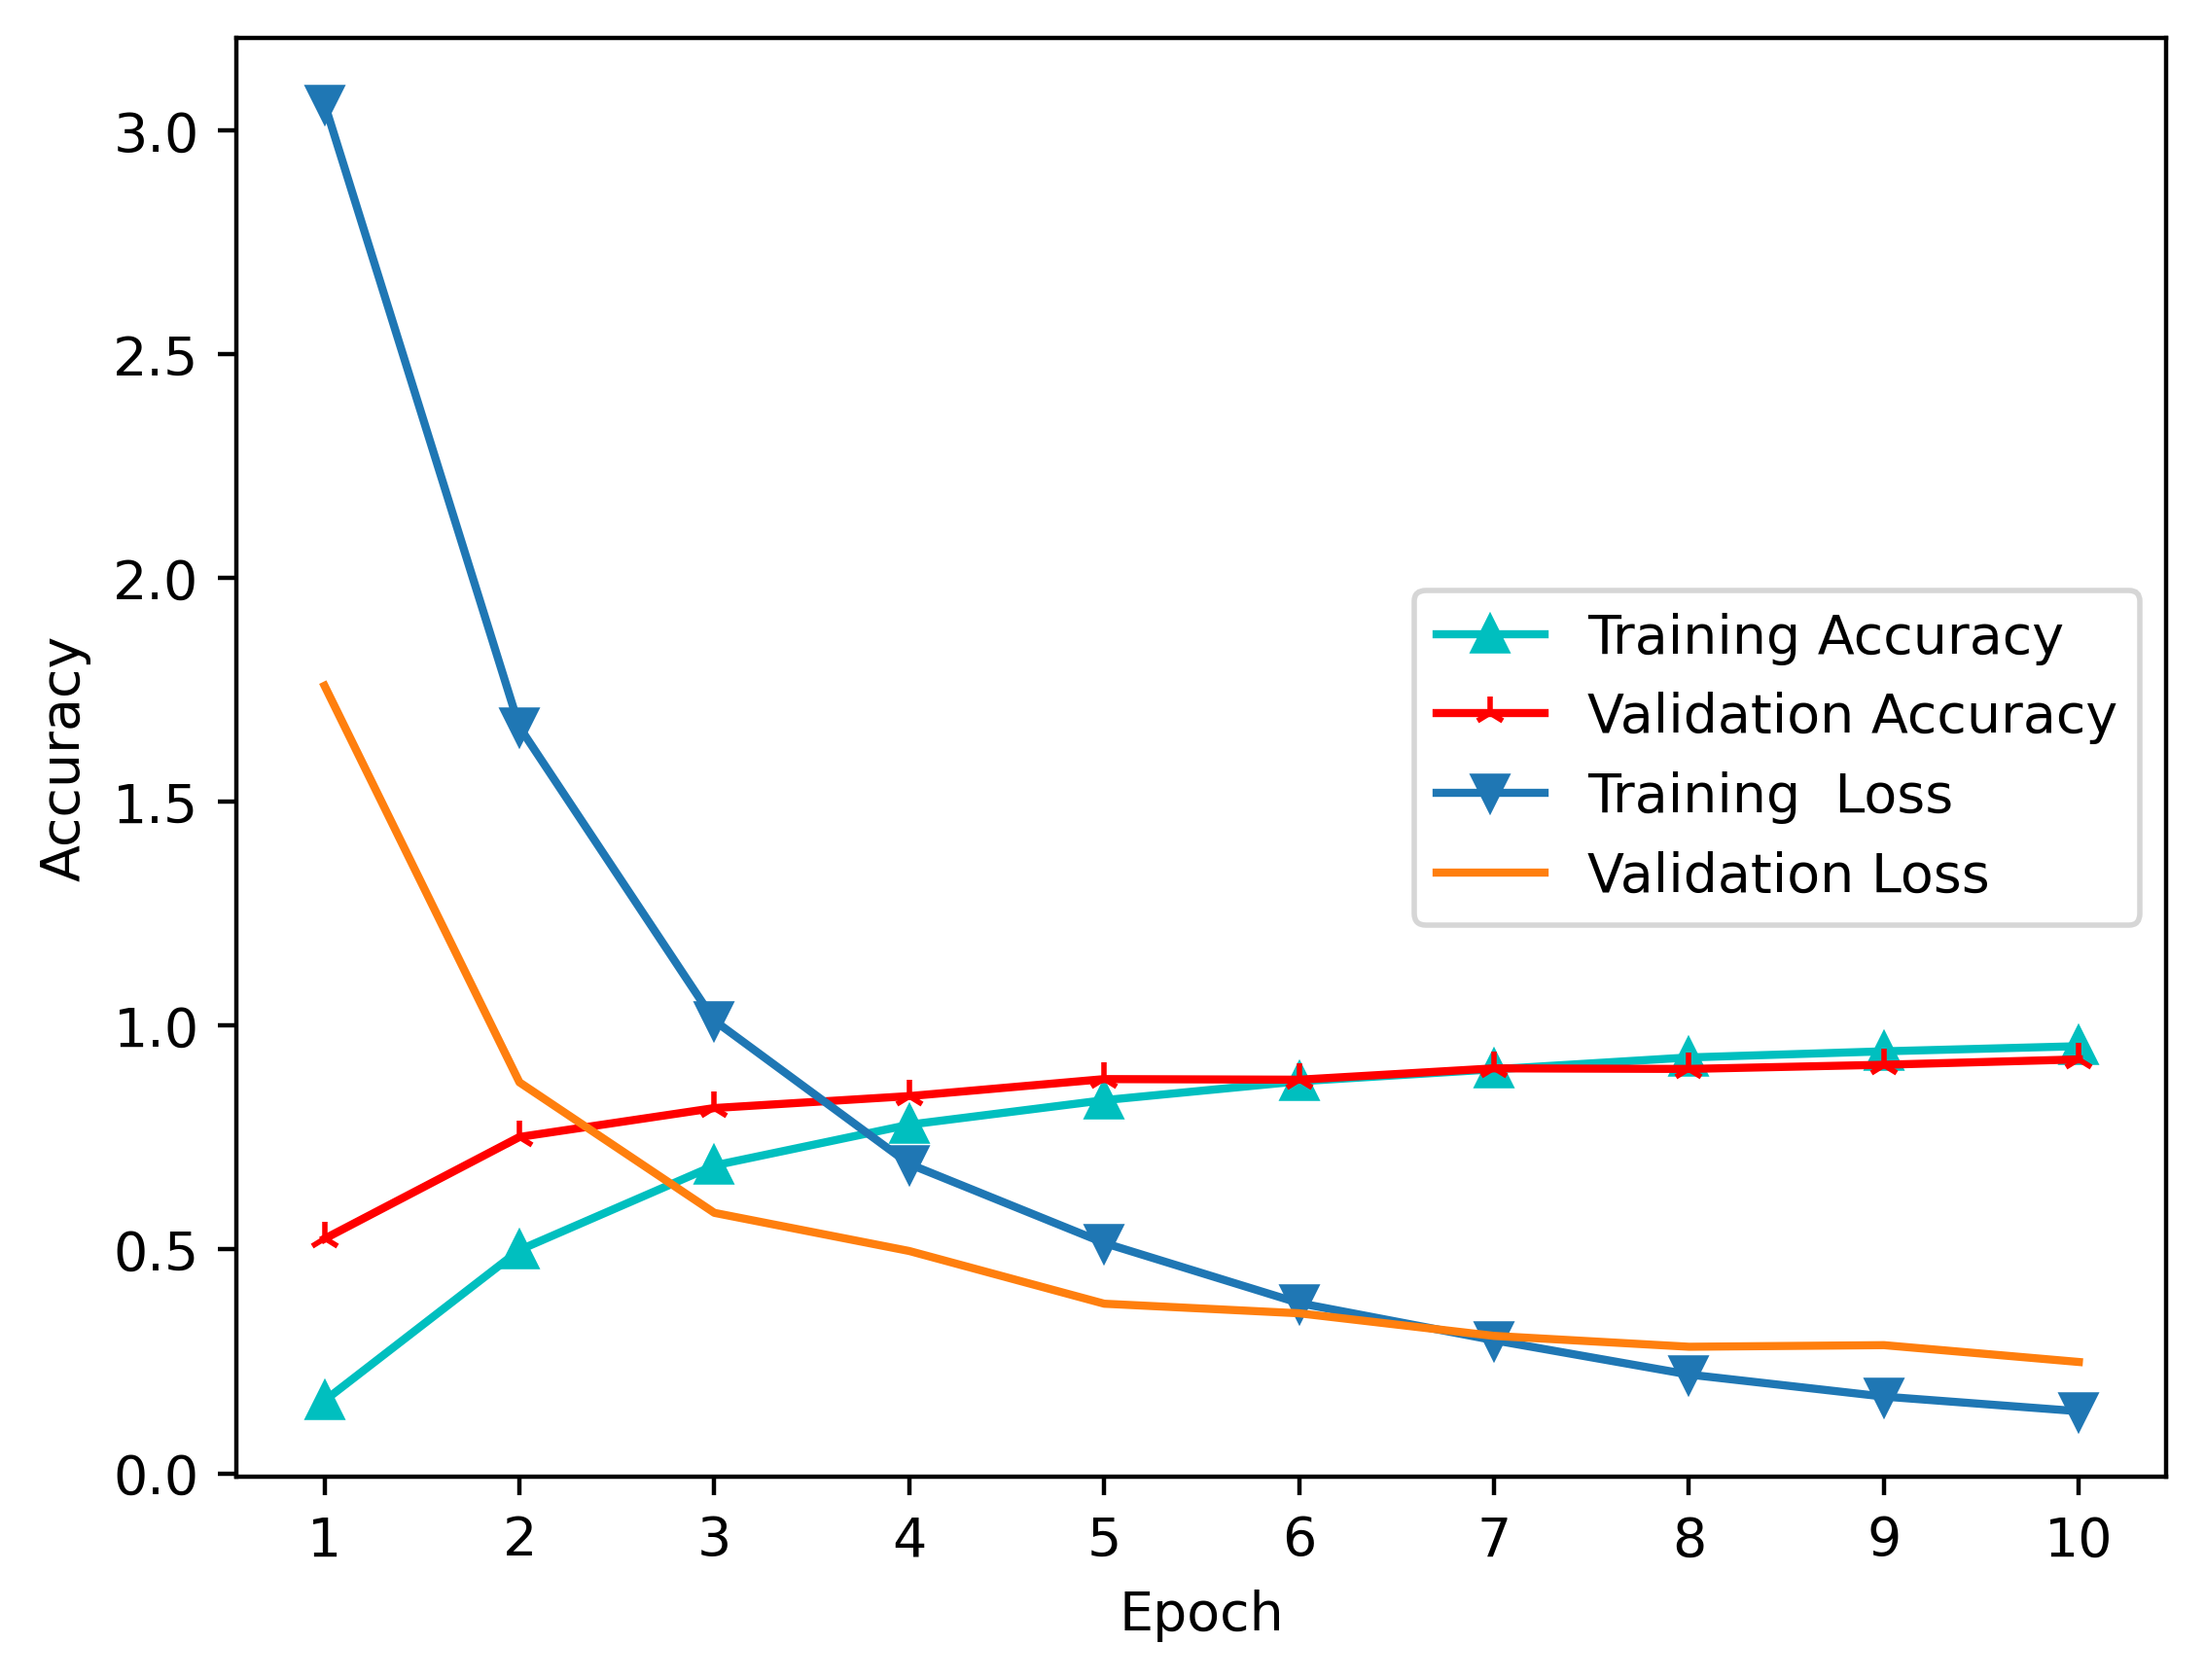

---------------------------------------------
aid-reference-km-5-vgg16
---------------------------------------------


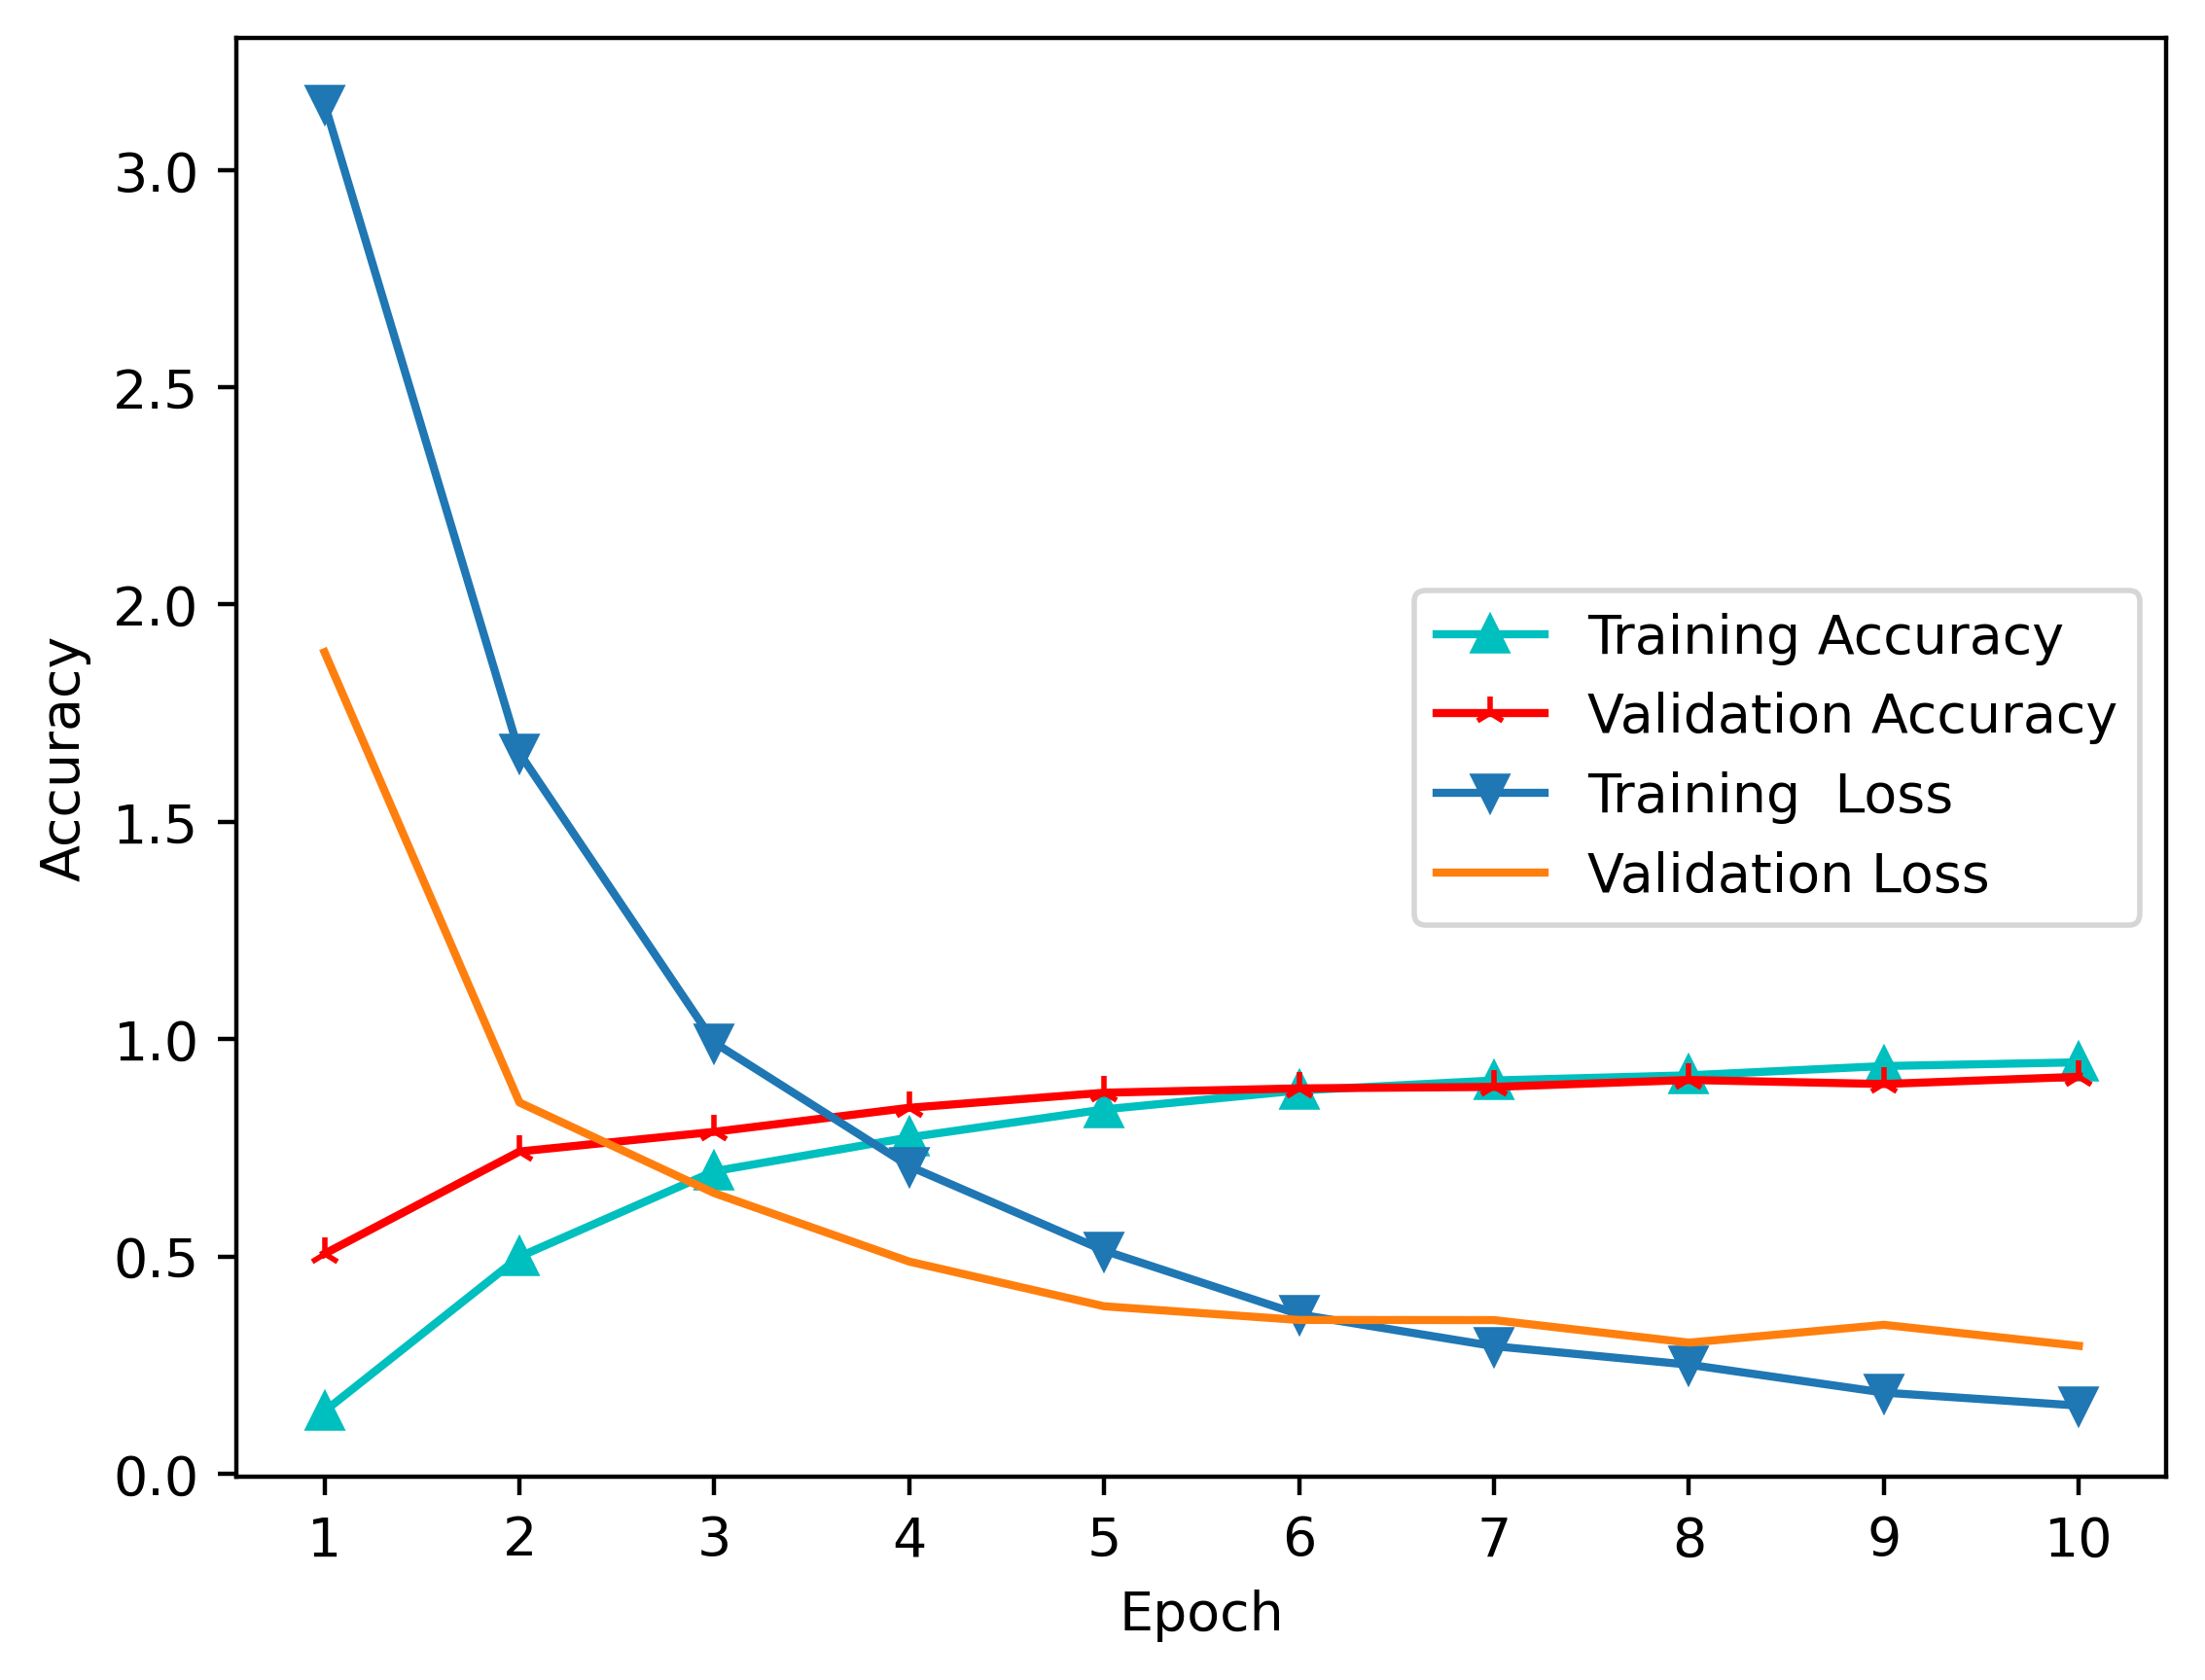

---------------------------------------------
aid-reference-km-6-vgg16
---------------------------------------------


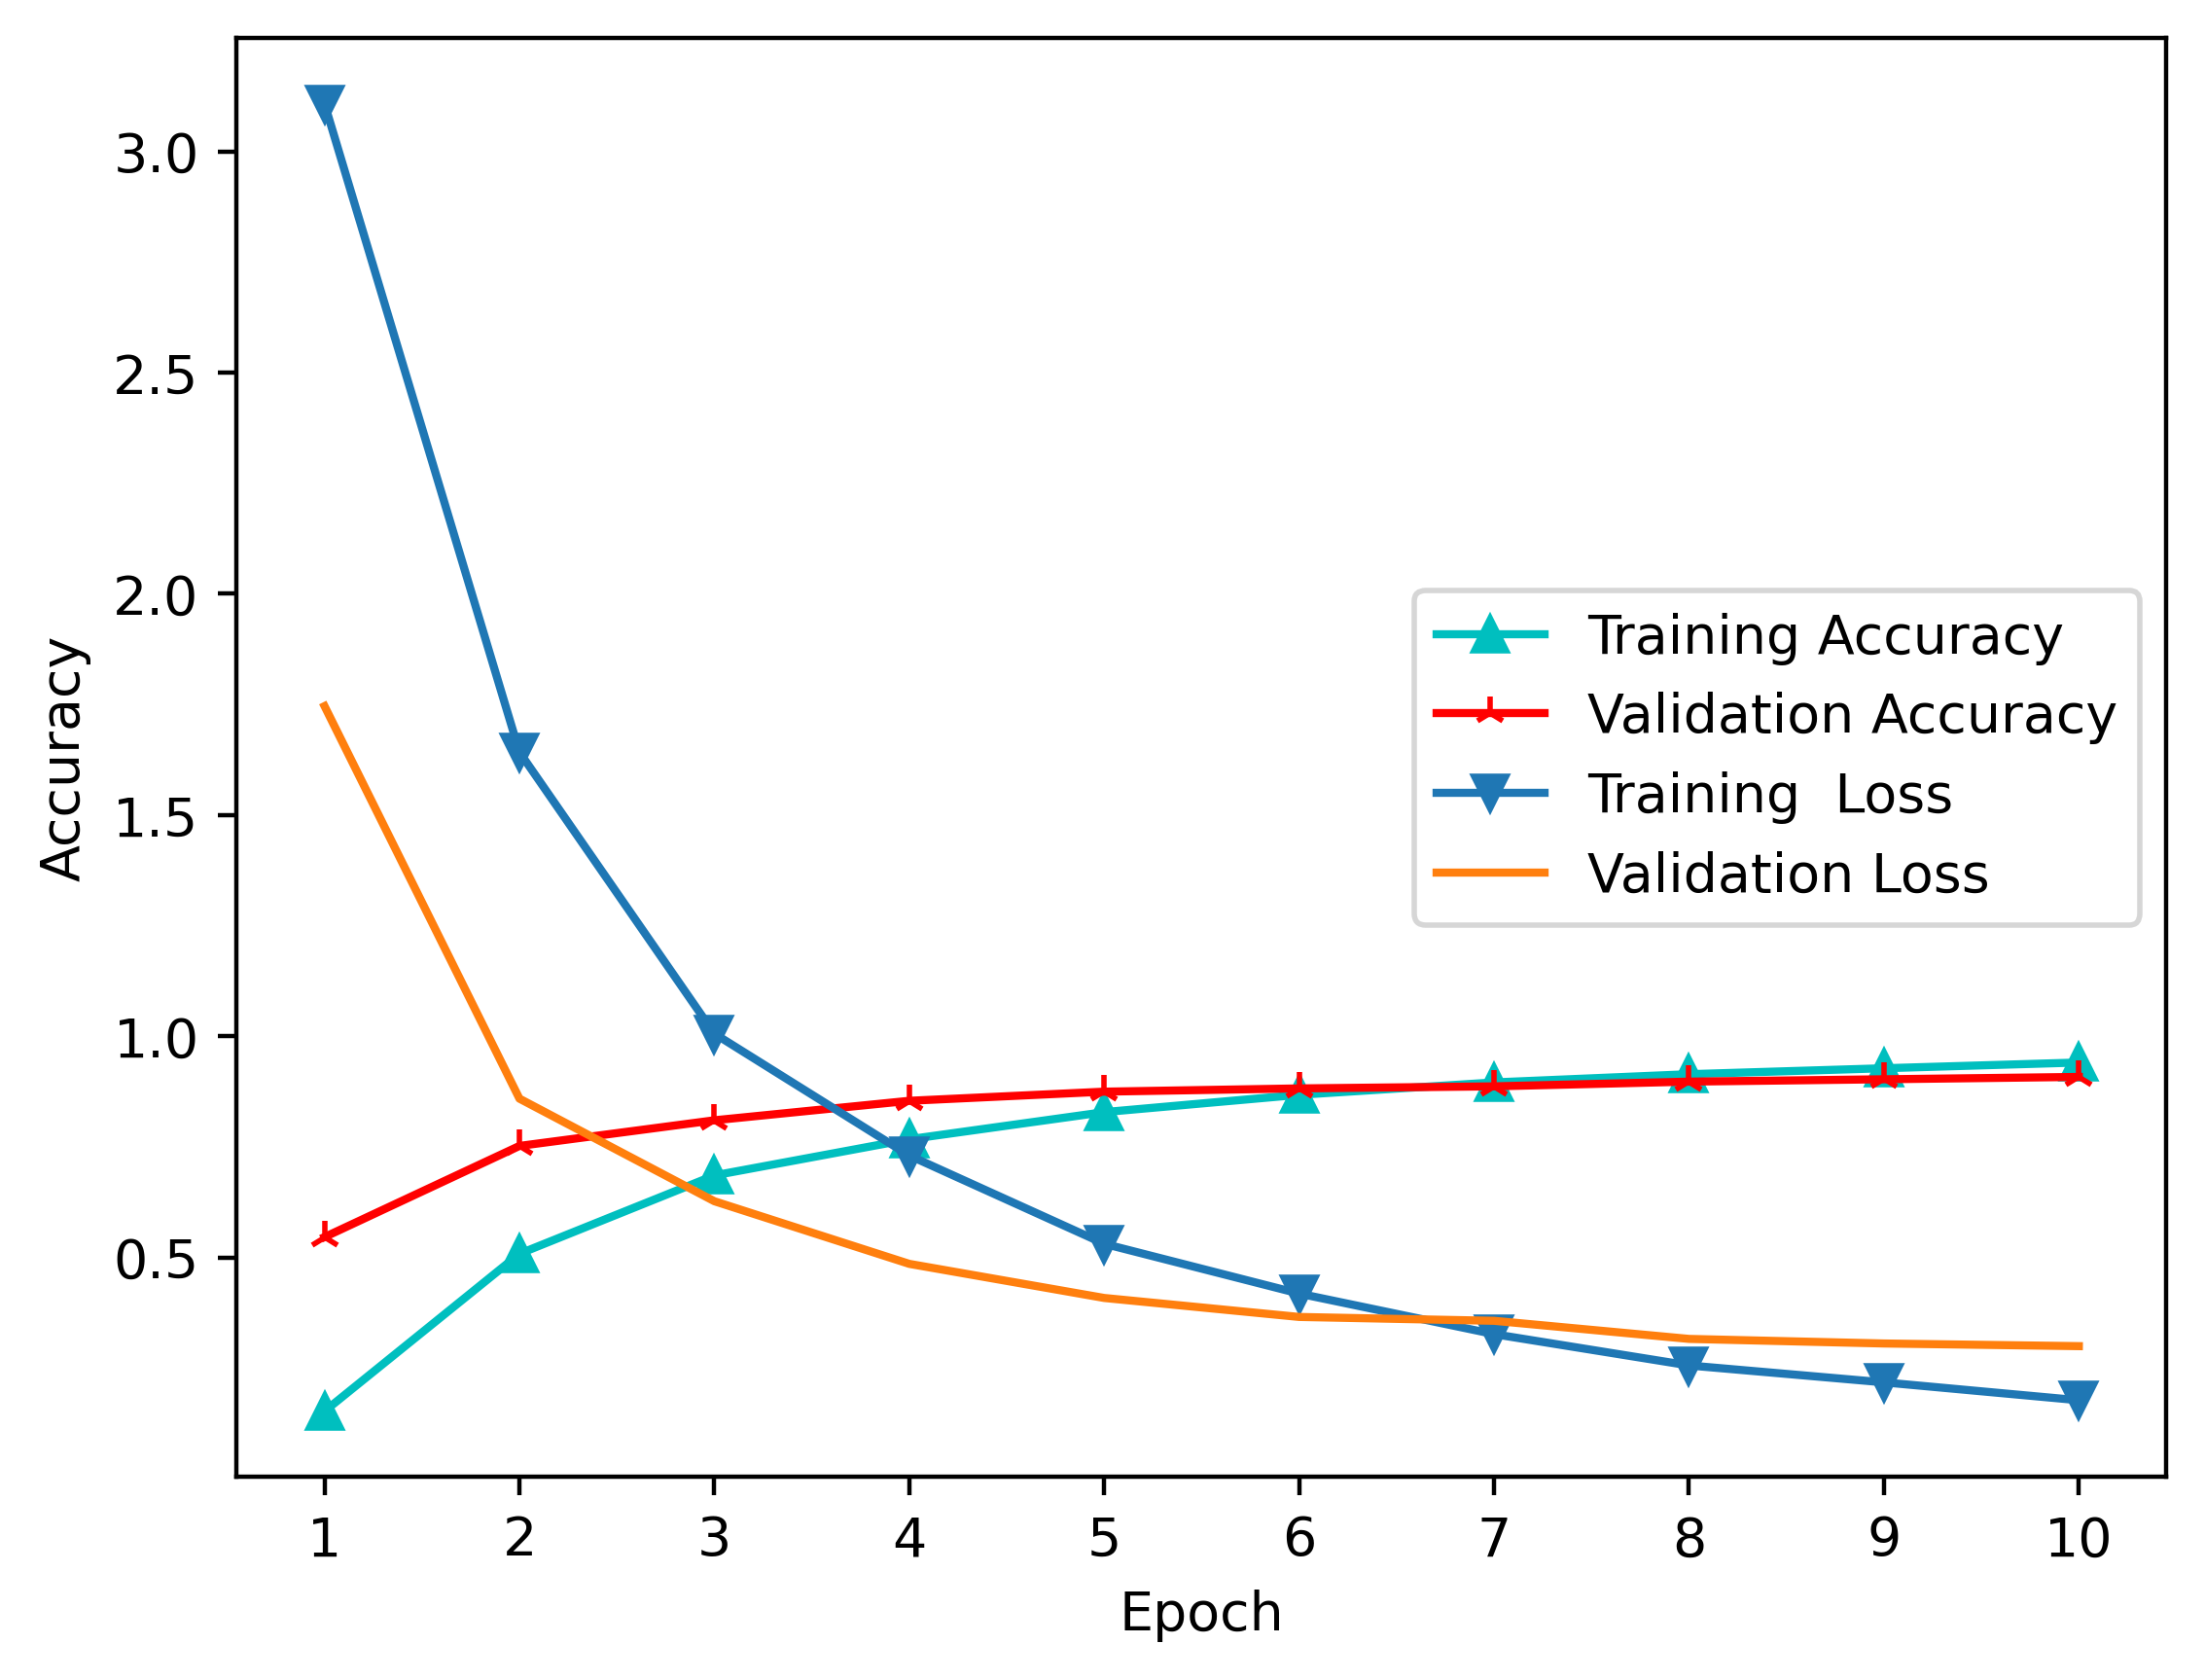

---------------------------------------------
aid-reference-km-7-vgg16
---------------------------------------------


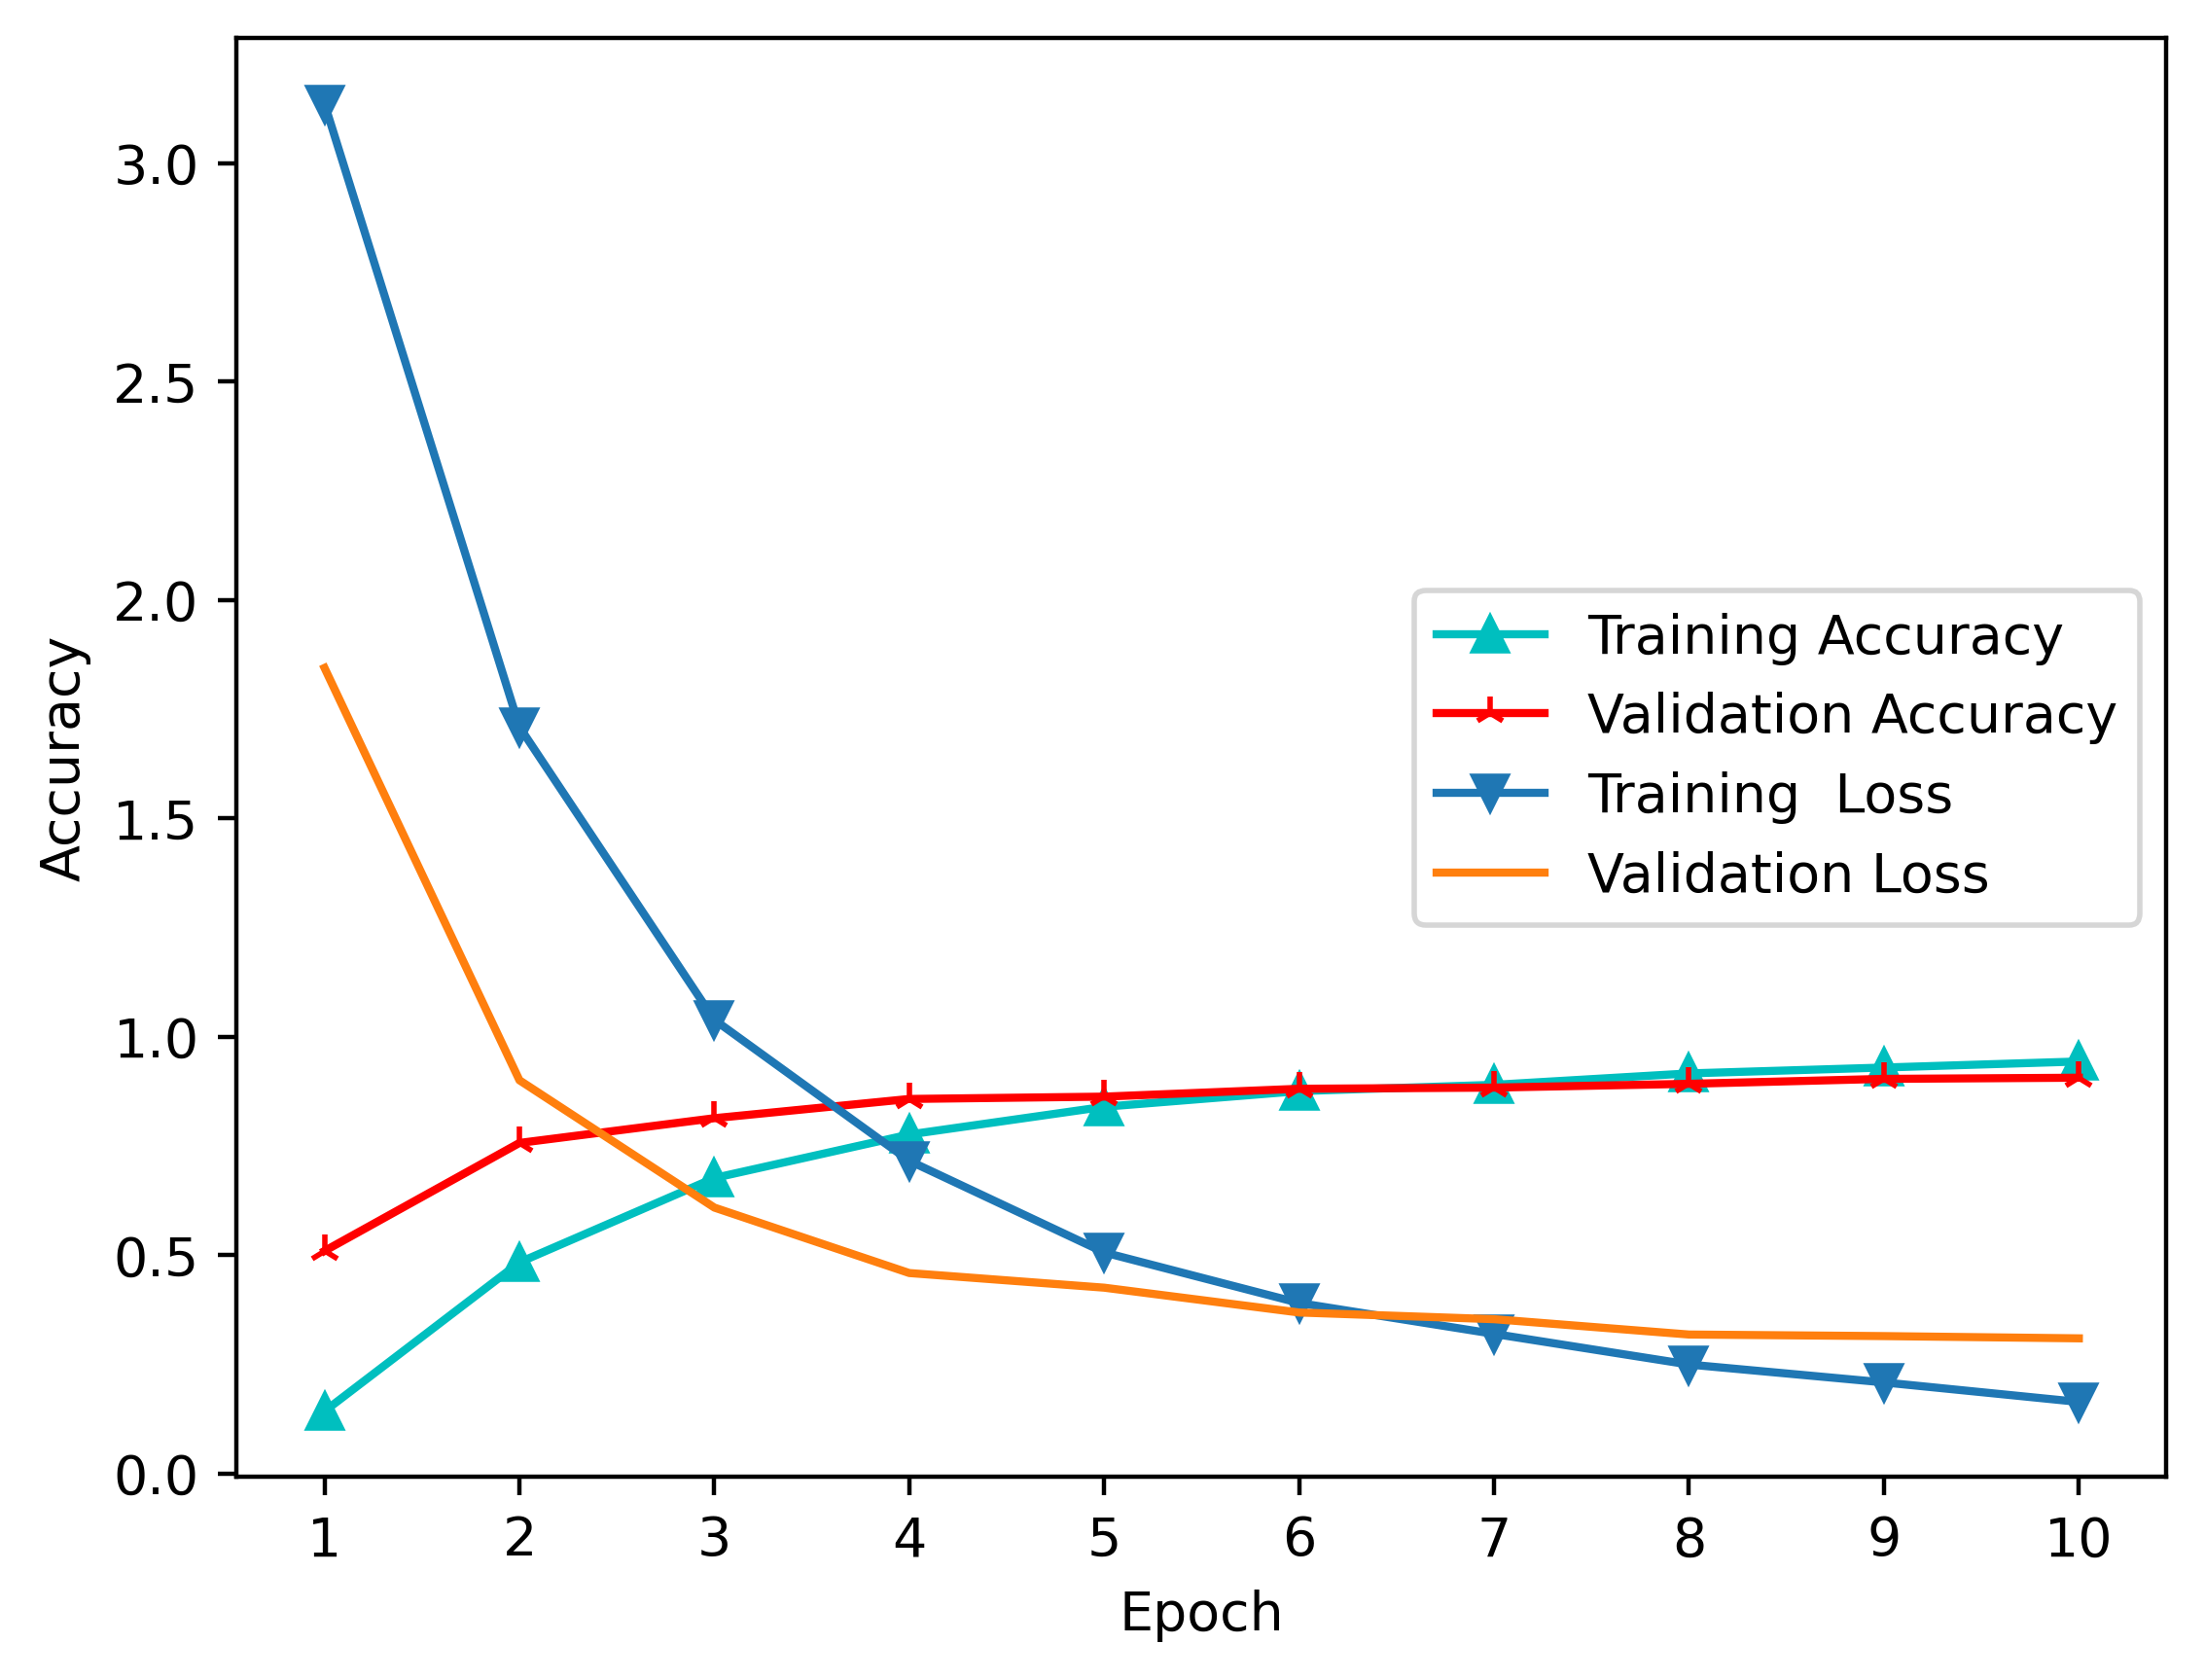

---------------------------------------------
aid-reference-km-8-vgg16
---------------------------------------------


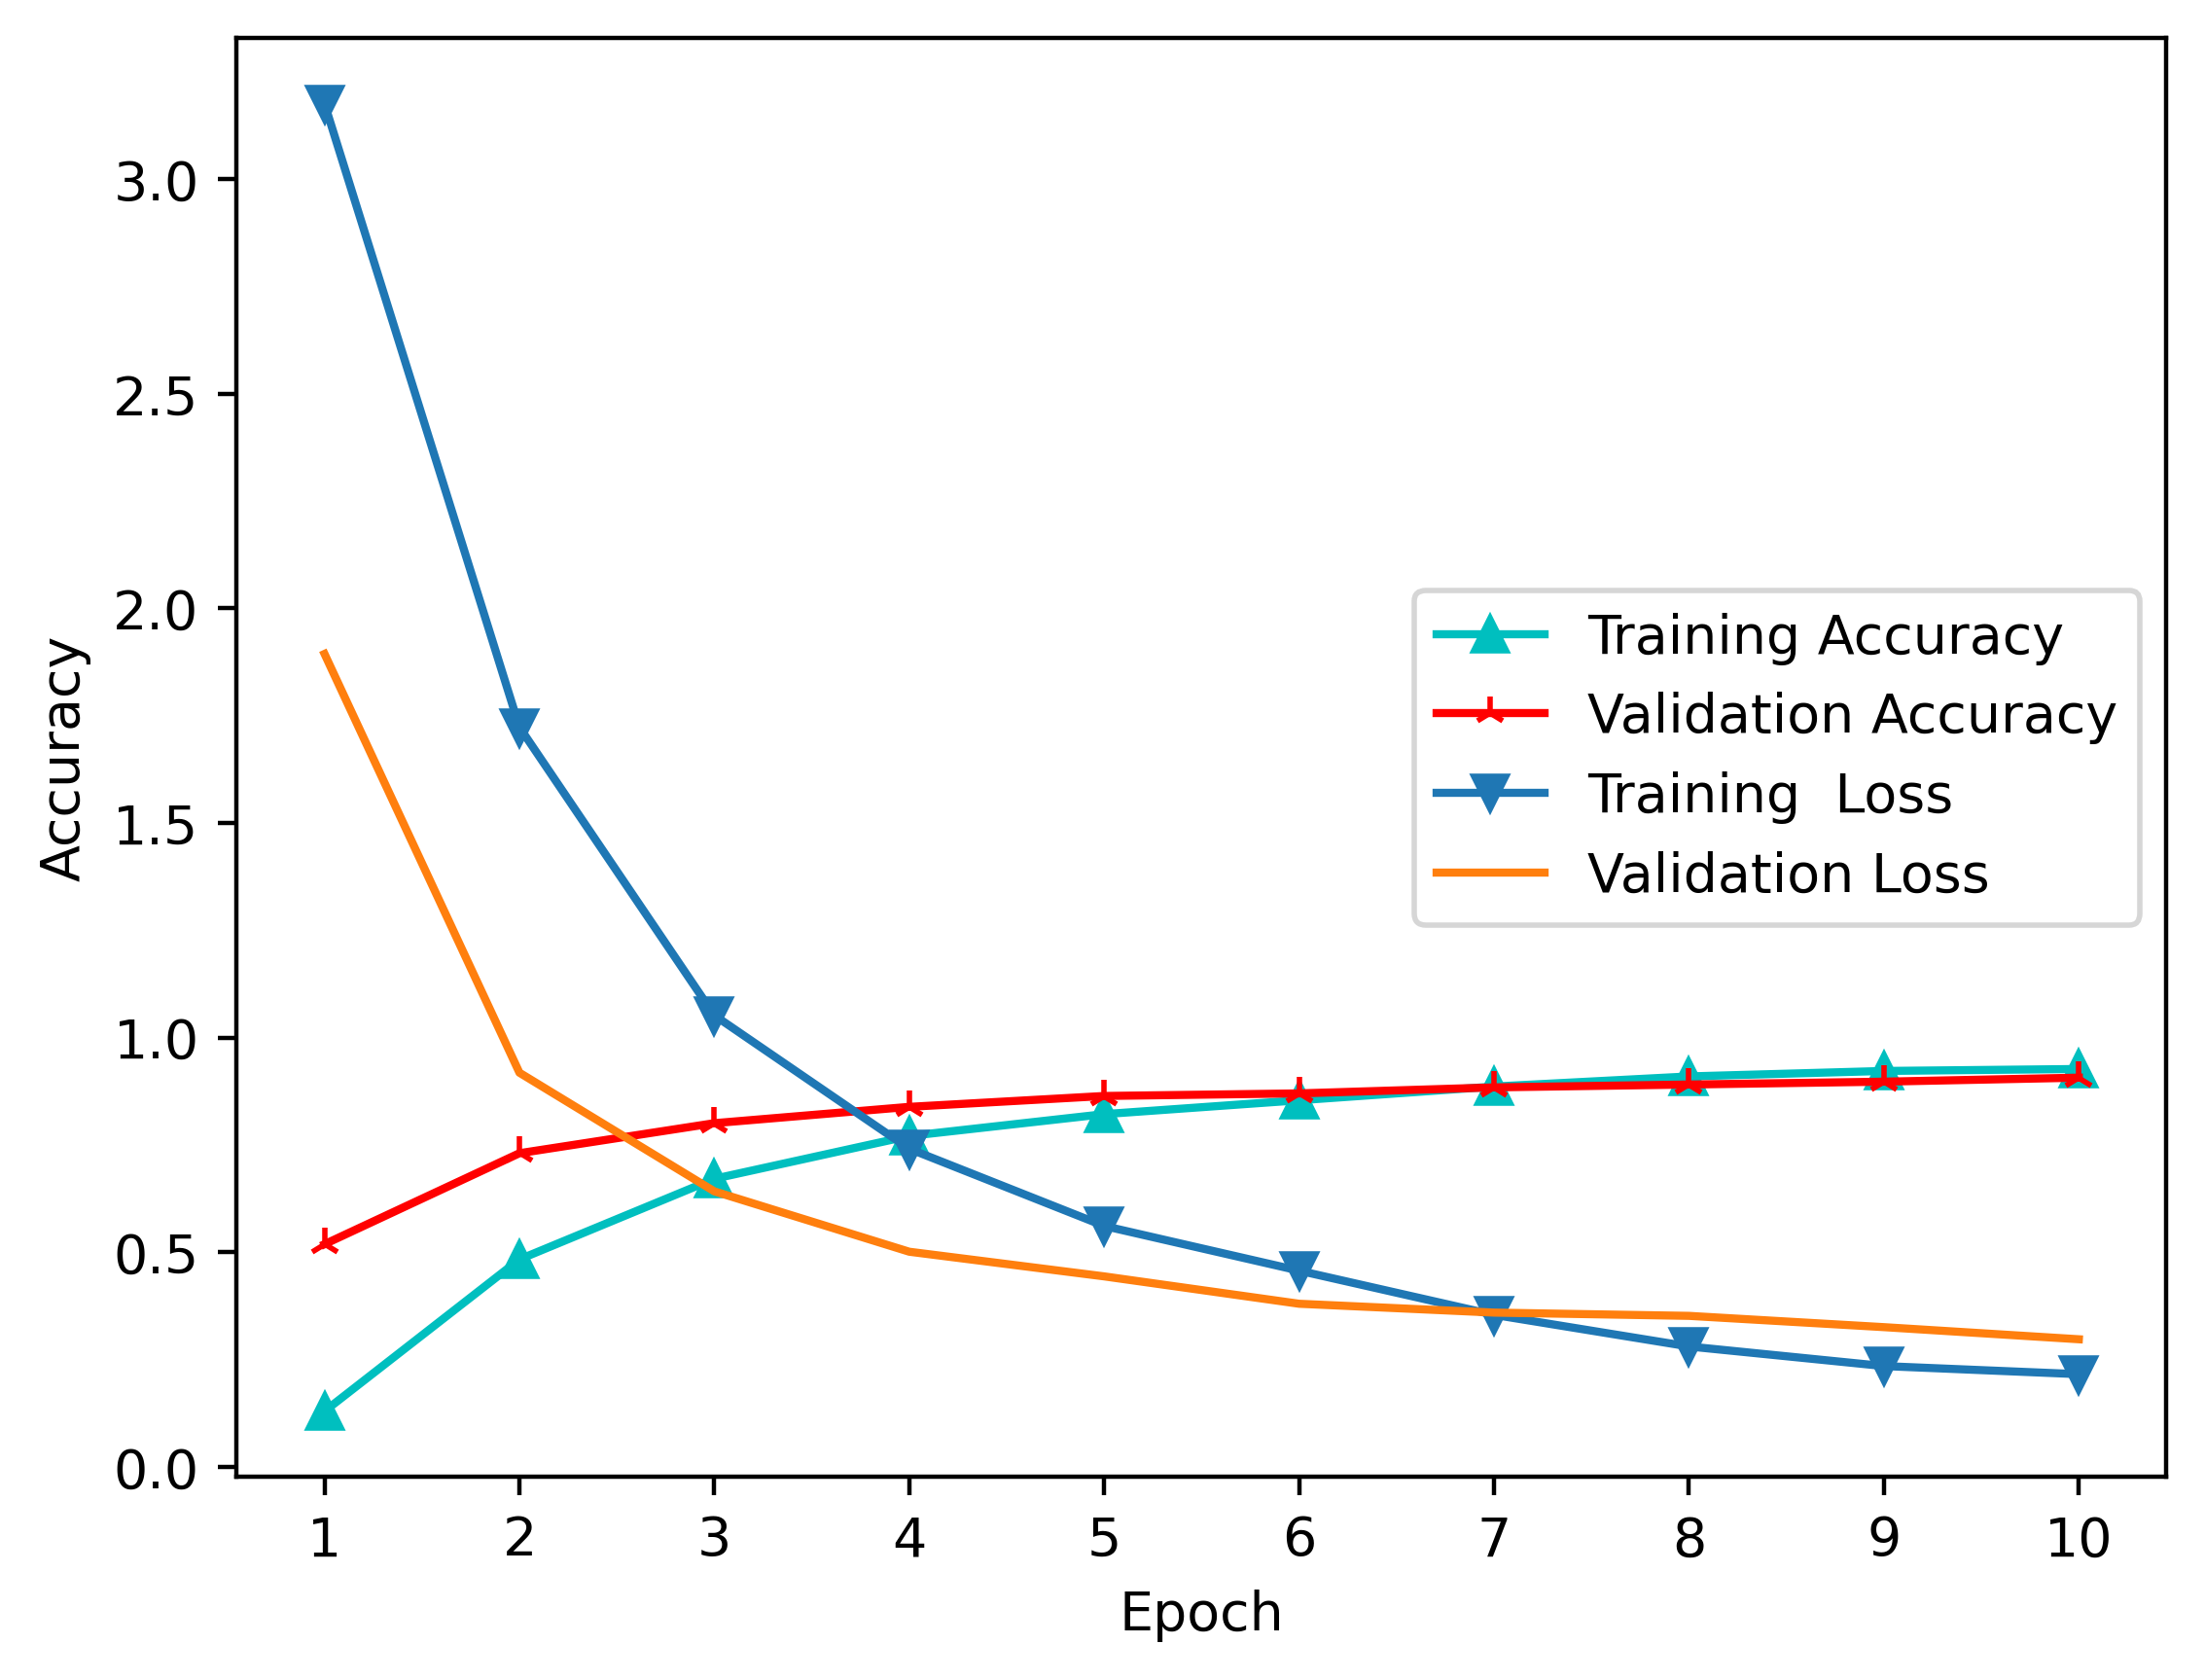

In [10]:
j_files = glob(lp + "/*"+ file_format +"-*/*.json")
j_files.sort()
for idx in range(f_max):
    f = open (j_files[idx], "r")
    data = json.loads(f.read())
    print("---------------------------------------------")
    print(j_files[idx].split("/")[-1].split("_")[1])
    print("---------------------------------------------")
    x = np.arange(1, len(data["history_acc"])+1) 
    plt.figure(dpi=400)

    plt.plot(x, data["history_acc"], 'c', marker='^')
    plt.plot(x, data['history_val_acc'], 'r', marker='2')
    plt.plot(x, data['history_loss'], marker='v')
    plt.plot(x, data['history_val_loss'], linestyle='solid')
    
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))

    #plt.title('Training and validation accuracy')
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    #plt.title(j_files[idx].split("/")[-1].split("_")[1])
    plt.legend(["Training Accuracy", "Validation Accuracy", "Training  Loss", "Validation Loss"], loc='center right', prop={'size': 10})
    plt.show()
    #plt.savefig(out + "/" + j_files[idx].split("/")[-1].split("_")[1] + '.pdf', bbox_inches='tight')

In [11]:
files = {}

for idx, i in enumerate(glob(lp + "/*/*.json")):
    text = i.split("/")[-1].split("_")[1]
    parts = text.split("-")
    k = parts[-2]
    f = parts[-4]
    
    if f not in files:
        files[f] = []
    files[f].append(i)

In [12]:
for key in files:
    files[key].sort()

In [13]:
acc = {}
timings = {}
for i in files:
    if i not in acc:
        acc[i] = []
        timings[i] = []
    for x in files[i]:
        with open(x) as j:
            j_data = json.loads(j.read())
            acc[i].append(j_data["history_val_acc"][-1])
            
            timings[i].append((datetime.datetime.strptime(j_data["training_time"], "%H:%M:%S.%f") - datetime.datetime(1900, 1, 1)).total_seconds())
            

In [14]:
x = np.arange(1, len(acc["reference"])+1) 

plt.figure(dpi=400)

legend = []

plt.plot(x, acc["jpg1"], marker='^')
legend.append("JPG QF 1")

plt.plot(x, acc["jpg10"], marker='v')
legend.append("JPG QF 10")

plt.plot(x, acc["jpg25"], marker='<')
legend.append("JPG QF 25")

plt.plot(x, acc["jpg50"], marker='>')
legend.append("JPG QF 50")

plt.plot(x, acc["jpg75"], marker='1')
legend.append("JPG QF 75")

plt.plot(x, acc["png95"], marker='o')
legend.append("PNG CL 95")

plt.plot(x, acc["bmp"], marker='s')
legend.append("BMP")

if "tif" in acc:
    plt.plot(x, acc["tif"], marker='x')
    legend.append("TIFF")

plt.plot(x, acc["reference"], marker='x')
legend.append("Reference")


plt.xlabel('Bit per Channel')
plt.ylabel('Accuracy')

#plt.title('Training and validation accuracy')
plt.legend(legend, loc='lower right', prop={'size': 10})
#plt.show()

plt.savefig(out + "/" + "bits" + '.pdf', bbox_inches='tight')

In [15]:
x = np.arange(1, len(timings["reference"])+1) 

plt.figure(dpi=400)

legend = []

plt.plot(x, timings["jpg1"], marker='^')
legend.append("JPG QF 1")

plt.plot(x, timings["jpg10"], marker='v')
legend.append("JPG QF 10")

plt.plot(x, timings["jpg25"], marker='<')
legend.append("JPG QF 25")

plt.plot(x, timings["jpg50"], marker='>')
legend.append("JPG QF 50")

plt.plot(x, timings["jpg75"], marker='1')
legend.append("JPG QF 75")

plt.plot(x, timings["png95"], marker='o')
legend.append("PNG CL 95")

plt.plot(x, timings["bmp"], marker='s')
legend.append("BMP")

if "tif" in acc:
    plt.plot(x, timings["tif"], marker='x')
    legend.append("TIFF")

plt.plot(x, timings["reference"], marker='x')
legend.append("Reference")


plt.xlabel('Bit per Channel')
plt.ylabel('Training Time [Seconds]')

#plt.title('Training and validation accuracy')
plt.legend(legend, loc='upper right', prop={'size': 10})
#plt.show()

plt.savefig(out + "/" + "time" + '.pdf', bbox_inches='tight')

In [16]:
for key in acc:
    for i, value in enumerate(acc[key]):
        print(f"{key}-{i+1}: {value}")

jpg25-1: 0.8926666378974915
jpg25-2: 0.8613333106040955
jpg25-3: 0.8973333239555359
jpg25-4: 0.9139999747276306
jpg25-5: 0.9053333401679993
jpg25-6: 0.8926666378974915
jpg25-7: 0.9046666622161865
jpg25-8: 0.8953333497047424
reference-1: 0.8526666760444641
reference-2: 0.906000018119812
reference-3: 0.9120000004768372
reference-4: 0.9246666431427002
reference-5: 0.9133333563804626
reference-6: 0.9079999923706055
reference-7: 0.906000018119812
reference-8: 0.9066666960716248
bmp-1: 0.8326666951179504
bmp-2: 0.9179999828338623
bmp-3: 0.9066666960716248
bmp-4: 0.9046666622161865
bmp-5: 0.909333348274231
bmp-6: 0.9053333401679993
bmp-7: 0.8973333239555359
bmp-8: 0.8980000019073486
jpg1-1: 0.7286666631698608
jpg1-2: 0.7793333530426025
jpg1-3: 0.8100000023841858
jpg1-4: 0.8220000267028809
jpg1-5: 0.8246666789054871
jpg1-6: 0.8299999833106995
jpg1-7: 0.8366666436195374
jpg1-8: 0.8259999752044678
tif-1: 0.8506666421890259
tif-2: 0.9013333320617676
tif-3: 0.9120000004768372
tif-4: 0.905333340167

In [17]:
for key in acc:
    for i, value in enumerate(timings[key]):
        print(f"{key}-{i+1}: {value}")

jpg25-1: 139.263012
jpg25-2: 138.186599
jpg25-3: 139.013545
jpg25-4: 138.497639
jpg25-5: 138.55601
jpg25-6: 138.684536
jpg25-7: 138.894873
jpg25-8: 138.966526
reference-1: 144.051869
reference-2: 147.5266
reference-3: 149.650308
reference-4: 150.871426
reference-5: 151.374502
reference-6: 151.337728
reference-7: 151.79665
reference-8: 151.828776
bmp-1: 170.600057
bmp-2: 168.651756
bmp-3: 169.324744
bmp-4: 170.203792
bmp-5: 168.155433
bmp-6: 169.084876
bmp-7: 170.084468
bmp-8: 171.127306
jpg1-1: 141.927051
jpg1-2: 142.133909
jpg1-3: 143.324146
jpg1-4: 143.018124
jpg1-5: 143.983223
jpg1-6: 143.331178
jpg1-7: 143.41796
jpg1-8: 143.08199
tif-1: 243.250712
tif-2: 244.949373
tif-3: 243.636761
tif-4: 243.594562
tif-5: 244.497318
tif-6: 242.23531
tif-7: 241.230124
tif-8: 240.028003
jpg50-1: 138.749807
jpg50-2: 139.026715
jpg50-3: 138.420456
jpg50-4: 138.263864
jpg50-5: 138.606778
jpg50-6: 137.352524
jpg50-7: 138.795624
jpg50-8: 138.455967
jpg5-1: 141.701008
jpg5-2: 142.362688
jpg5-3: 141.59145